In [1]:
import detectron2
import torch
import numpy as np
import cv2 
import os
import matplotlib.pyplot as plt
import matplotlib
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['figure.dpi']=100
os.environ["CUDA_VISIBLE_DEVICES"]="0"

/home/ancao/anaconda3/lib/python3.7/site-packages/matplotlib/backend_bases.py:57: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in a future release. Use __version__ instead.
  from PIL import PILLOW_VERSION


In [2]:
from vis_det.model_pool import get_data, get_model
from vis_det.data import query_image,data_preprocessing
from detectron2.utils.visualizer import Visualizer
from vis_det.optimize import layout_optimize, layout_vis_loss

In [3]:
## load data 
coco_val, coco_val_meta = get_data("coco_2017_val")

/home/ancao/anaconda3/lib/python3.7/site-packages/pycocotools/coco.py:84: ResourceWarning: unclosed file <_io.TextIOWrapper name='datasets/coco/annotations/instances_val2017.json' mode='r' encoding='UTF-8'>
  dataset = json.load(open(annotation_file, 'r'))


In [4]:
## load model and corresponding arg, cfg and predictor.
model, args, cfg, predictor = get_model("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN")
# model, args, cfg, predictor = get_model("COCO-Detection/retinanet_R_50_FPN")
# model, args, cfg, predictor = get_model("COCO-Detection/faster_rcnn_R_50_FPN")

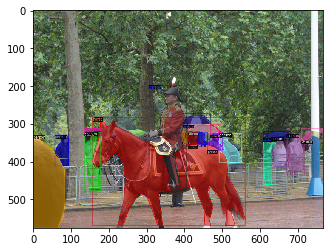

In [5]:
## load the target image layouts and show.
target_img = "000000439715"
target_image = query_image(target_img, coco_val)
images, gt_instances, mapper_target = data_preprocessing(cfg,target_image,model)
img = cv2.imread(target_image["file_name"])
visualizer = Visualizer(img, metadata=coco_val_meta, scale=1.2)
vis = visualizer.draw_dataset_dict(target_image)
plt.imshow(vis.get_image()[:,:,::-1])

In [6]:
loss_func = layout_vis_loss(args)
inverter = layout_optimize(args, cfg)
x = inverter.invert(images, gt_instances, model, loss_func)

Into Invert
Mask Invert
Initialization 
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


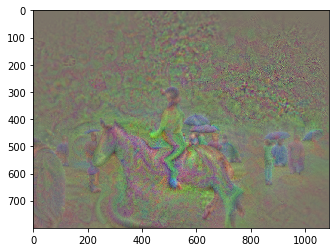

In [7]:
# draw the inverse
inverse_img = inverter.post_processing(x)
plt.imshow(inverse_img[0][:,:,::-1])

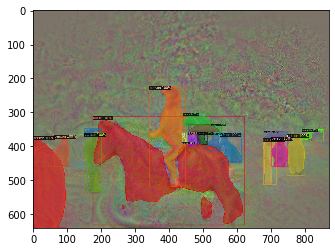

In [8]:
## show the prediction results.
inverse_img = inverse_img[0]
outputs = predictor(inverse_img)
v1 = Visualizer(inverse_img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.8)
v1 = v1.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(v1.get_image())